In [13]:
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [14]:
municipality_df = pd.read_csv('../assessment_8/data/municipality_df.csv')
gdp_df = pd.read_csv('../assessment_8/data/gdp_df.csv')

In [15]:
miami = municipality_df[municipality_df['Municipality'] == 'Miami-Fort Lauderdale-West Palm Beach, FL Metro Area']
miami.shape

orlando = municipality_df[municipality_df['Municipality'] == 'Orlando-Kissimmee-Sanford, FL Metro Area']
orlando.shape

tampa = municipality_df[municipality_df['Municipality'] == 'Tampa-St. Petersburg-Clearwater, FL Metro Area']
tampa.shape

(63, 8)

### Firm Sales vs. Total Firms by Municipality

In [16]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Orlando', 'Miami', 'Tampa'))

fig.add_trace(go.Bar(x=orlando['Firm_Sale_Amount'], y=orlando['Amount_of_Firms'], name='Orlando'), row=1, col=1)
fig.add_trace(go.Bar(x=miami['Firm_Sale_Amount'], y=miami['Amount_of_Firms'], name='Miami'), row=1, col=2)
fig.add_trace(go.Bar(x=tampa['Firm_Sale_Amount'], y=tampa['Amount_of_Firms'], name='Tampa'), row=1, col=3)

fig.update_layout(title='Firm Sales vs. Total Firms in all Municipalities', xaxis=dict(title='Firm Sale Amount'), yaxis=dict(title='Amount of Firms'))
fig.show()

### Diversity by Municipality

In [17]:
grouped_gender_tampa = tampa.groupby('Gender')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

grouped_gender_orlando = orlando.groupby('Gender')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

grouped_gender_miami = miami.groupby('Gender')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

print('Gender Data')
print(grouped_gender_tampa, grouped_gender_orlando, grouped_gender_miami)

grouped_eth_tampa = tampa.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_eth_tampa.astype(int)

grouped_eth_orlando = orlando.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_gender_tampa.astype(int)

grouped_eth_miami = miami.groupby('Ethnicity')['Amount_of_Firms'].mean()
grouped_eth_tampa.astype(int)
print('==============================')
print('Eth Data')
print(grouped_eth_tampa, grouped_eth_orlando, grouped_eth_miami)

Gender Data
Gender
Equally male/female     980.333333
Female                 1440.000000
Male                   4232.888889
Name: Amount_of_Firms, dtype: float64 Gender
Equally male/female     869.333333
Female                 1268.777778
Male                   3513.777778
Name: Amount_of_Firms, dtype: float64 Gender
Equally male/female     2835.777778
Female                  4366.444444
Male                   11239.000000
Name: Amount_of_Firms, dtype: float64
Eth Data
Ethnicity
Equally Hispanic/non-Hispanic      21.111111
Hispanic                          630.222222
Non-Hispanic                     6038.444444
Name: Amount_of_Firms, dtype: float64 Ethnicity
Equally Hispanic/non-Hispanic       0.000000
Hispanic                          644.777778
Non-Hispanic                     4815.222222
Name: Amount_of_Firms, dtype: float64 Ethnicity
Equally Hispanic/non-Hispanic      235.666667
Hispanic                          5325.333333
Non-Hispanic                     12749.777778
Name: Amount

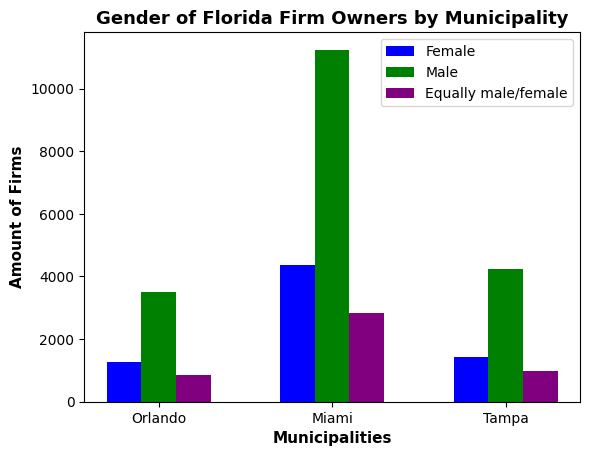

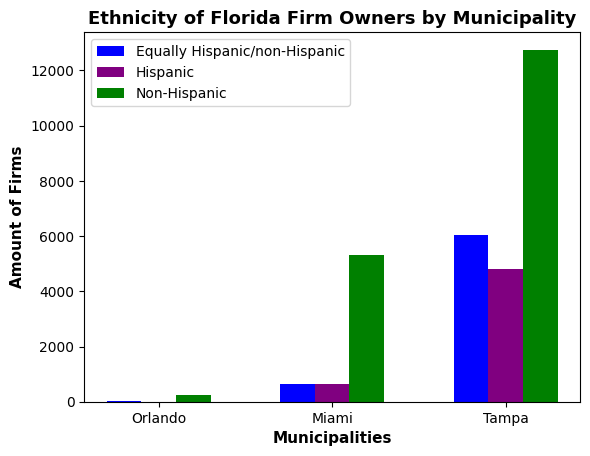

In [18]:
x = np.arange(3)
f = [1268, 4366, 1440]
m = [3513, 11239, 4232]
e = [869, 2835, 980]
width = 0.2

plt.bar(x-0.2, f, width, color='blue')
plt.bar(x, m, width, color='green')
plt.bar(x+0.2, e, width, color='purple')
plt.xticks(x, ['Orlando', 'Miami', 'Tampa'])
plt.xlabel("Municipalities", fontsize=11, weight = 'heavy')
plt.ylabel("Amount of Firms", fontsize=11, weight = 'bold')
plt.title('Gender of Florida Firm Owners by Municipality', fontsize=13, weight = 'heavy')
plt.legend(["Female", "Male", "Equally male/female"])
plt.style.use('default')
plt.show()

x = np.arange(3)
e = [21, 630, 6038]
h = [0, 645, 4815]
nh = [235, 5325, 12749]
width = 0.2

plt.bar(x-0.2, e, width, color='blue')
plt.bar(x, h, width, color='purple')
plt.bar(x+0.2, nh, width, color='green')
plt.xticks(x, ['Orlando', 'Miami', 'Tampa'])
plt.xlabel("Municipalities", fontsize=11, weight = 'heavy')
plt.ylabel("Amount of Firms", fontsize=11, weight = 'heavy')
plt.title('Ethnicity of Florida Firm Owners by Municipality', fontsize=13, weight = 'heavy')
plt.legend(["Equally Hispanic/non-Hispanic", "Hispanic", "Non-Hispanic"])
plt.style.use('default')
plt.show()

### Firm Amount with GDP 

In [19]:
year_gdp = gdp_df[gdp_df['DATE'] == '2018-01-01']


firm_amount = municipality_df.groupby('Municipality')['Amount_of_Firms'].sum().reset_index()
firm_amount
year_gdp

,DATE,Tampa_GDP,Miami_GDP,Orlando_GDP
17,2018-01-01,141091.139,319777.839,158969.547


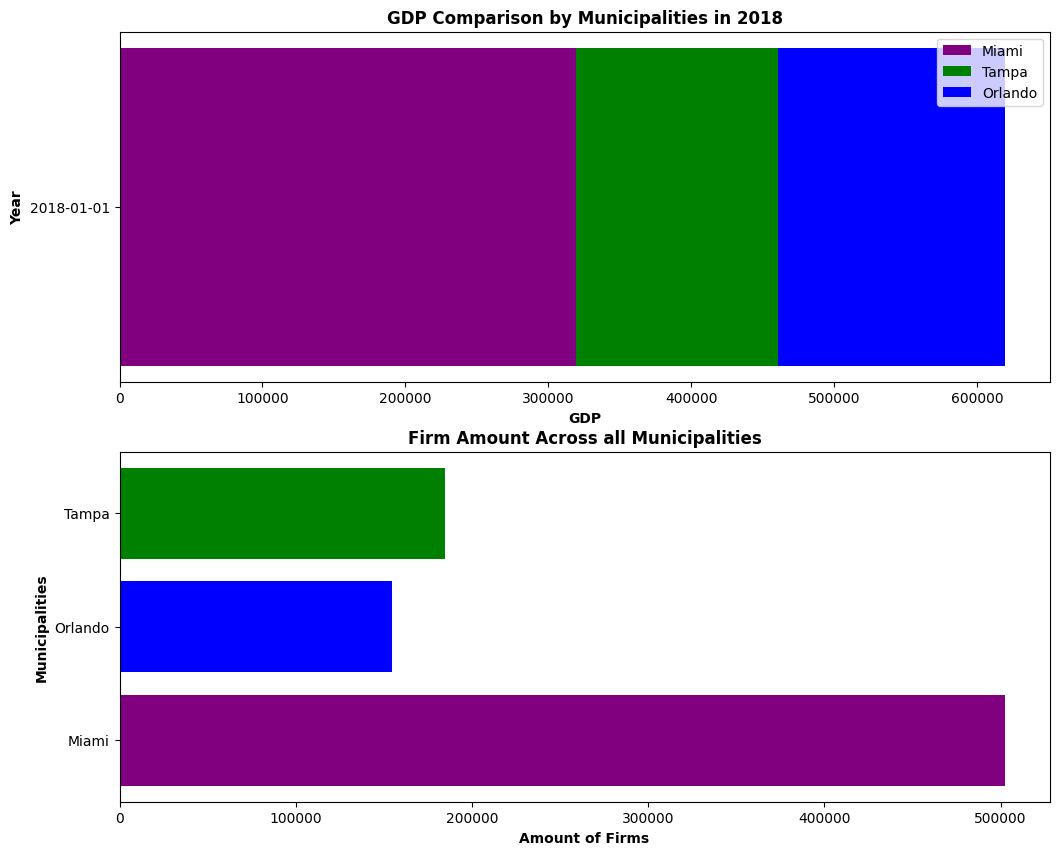

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

y = year_gdp['DATE']
x1 = year_gdp['Miami_GDP']
x2 = year_gdp['Tampa_GDP']
x3 = year_gdp['Orlando_GDP']
ax1.barh(y, x1, height=0.05, color='purple', align='center')
ax1.barh(y, x2, height=0.05, color='green', align='center', left=x1)
ax1.barh(y, x3, height=0.05, color='blue', align='center', left=x1+x2)
ax1.set_xlabel('GDP', weight = 'bold')
ax1.set_ylabel('Year', weight = 'bold')
ax1.set_title('GDP Comparison by Municipalities in 2018', weight = 'heavy')
ax1.legend(['Miami', 'Tampa', 'Orlando'])


labels = ['Miami', 'Orlando', 'Tampa']
colors = [ 'purple', 'blue', 'green']
ax2.barh(firm_amount['Municipality'], firm_amount['Amount_of_Firms'], color= colors)
ax2.set_title('Firm Amount Across all Municipalities', weight = 'heavy')
ax2.set_xlabel('Amount of Firms', weight = 'bold')
ax2.set_ylabel('Municipalities', weight = 'bold')
plt.yticks(range(len(labels)), labels)
plt.show()

### Correlation Between Amount of Firms and Employees 

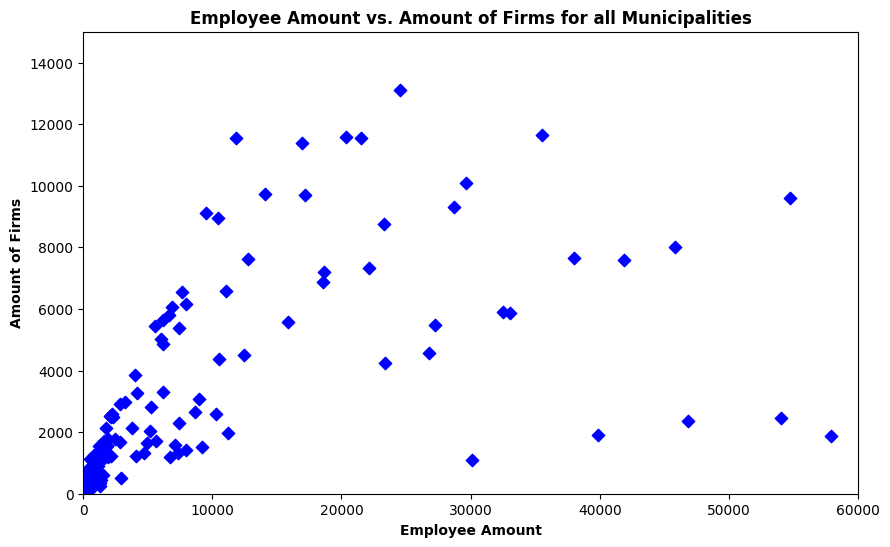

Correlation Matrix:


,Employee_Amount,Amount_of_Firms
Employee_Amount,1.000000,0.614902
Amount_of_Firms,0.614902,1.000000


In [21]:
correl_matrix = municipality_df[['Employee_Amount', 'Amount_of_Firms']]
correl_matrix
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(correl_matrix['Employee_Amount'], correl_matrix['Amount_of_Firms'], marker='D', s=40, c='blue')
plt.xlabel('Employee Amount', weight = 'bold')
plt.ylabel('Amount of Firms', weight = 'bold')
plt.title('Employee Amount vs. Amount of Firms for all Municipalities', weight = 'heavy')
plt.xlim(0, 60000)
plt.ylim(0, 15000)
plt.style.use('default')
plt.show()
# outliers to show
# as employee goes higher, does not mean there are more firms
# plt.xlim(0, 1000000)
# plt.ylim(0, 100000)   


df = pd.DataFrame(correl_matrix)
print('Correlation Matrix:')
corrM = df.corr()
corrM

### GDP Over the Years by Municipality

In [22]:
fig = px.area(gdp_df, x = 'DATE', y = ['Tampa_GDP', 'Orlando_GDP', 'Miami_GDP' ], 
        title = 'Municipalities GDP from 2001 to 2021',
        color_discrete_sequence=['blue', 'green', 'purple'])

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='GDP',)
fig.show()